In [1]:
import os
import keras

import keras_rcnn.datasets.shape
import keras_rcnn.models
import keras_rcnn.preprocessing
import numpy 
from keras_rcnn import utils
from keras_rcnn.datasets import dsb2018
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

%matplotlib inline
training_dictionary, test_dictionary = dsb2018.load_data()


/root/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:

# Very important ! Categories names must match those of the dataset.
categories = {"nucleus": 1}

generator = keras_rcnn.preprocessing.ObjectDetectionGenerator()

generator = generator.flow_from_dictionary(
    dictionary=training_dictionary,
    categories=categories,
    target_size=(224, 224)
)

validation_data = keras_rcnn.preprocessing.ObjectDetectionGenerator()

validation_data = validation_data.flow_from_dictionary(
    dictionary=test_dictionary,
    categories=categories,
    target_size=(224, 224)
)

target, _ = generator.next()

target_bounding_boxes, target_categories, target_images, target_masks, target_metadata = target

target_bounding_boxes = numpy.squeeze(target_bounding_boxes)

target_images = numpy.squeeze(target_images)

target_categories = numpy.argmax(target_categories, -1)

target_categories = numpy.squeeze(target_categories)

# keras_rcnn.utils.show_bounding_boxes(target_images, target_bounding_boxes, target_categories)



            

/root/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [3]:

# To debug BB

# for item in generator:
#     generated, _ = item
#     target_bounding_boxes, target_categories, target_images, target_masks, target_metadata = generated

#     no_error = True
#     for bbox in target_bounding_boxes[0]:
#         #print(bbox)
#         cmin, rmin, cmax, rmax = bbox
#         #print(cmin, rmin, cmax, rmax)
#         area = (cmax-cmin)*(rmax-rmin)
#         if cmin == cmax or rmax == rmin:
#             no_error = False
#             print(bbox)
#             print('error')



In [3]:
model = keras_rcnn.models.RCNN((224, 224, 3), ["nucleus"])


In [19]:
optimizer = keras.optimizers.Adam(lr=0.001)

model.compile(optimizer)

/home/eliotandres/incalia/keras-rcnn/keras_rcnn/models/_rcnn.py:285: UserWarning: Output "object_detection_4" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "object_detection_4" during training.
  super(RCNN, self).compile(optimizer, None)


In [10]:
callbacks = [ModelCheckpoint(monitor='loss',
                                     filepath=os.path.join('weights', 'best.model'),
                                     save_best_only=True,
                                     save_weights_only=True)]

In [ ]:
model.fit_generator(
    epochs=10,  
    callbacks=callbacks,
    generator=generator)

In [6]:
model.load_weights('../weights/best.model')


/root/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


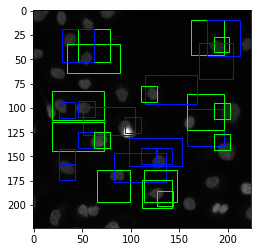

In [7]:
target, _ = generator.next()

target_bounding_boxes, target_categories, target_images, target_masks, target_metadata = target
bbox, categories = model.predict(target)
keras_rcnn.utils.show_bounding_boxes(numpy.squeeze(target_images), numpy.squeeze(bbox), numpy.squeeze(categories))
